In [1]:
# Importing necessary libraries for data analysis, numerical array manipulation, random number generation, and result visualization.
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
# Loading datasets from TSV files
name_basics = pd.read_csv('data/name.basics.tsv', sep = '\t', usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'])
title_basics = pd.read_csv('data/title.basics.tsv', sep = '\t', usecols=['tconst', 'titleType', 'primaryTitle', 'genres'])
title_ratings = pd.read_csv('data/title.ratings.tsv', sep = '\t', usecols=['tconst', 'numVotes'])
title_principals = pd.read_csv('data/title.principals.tsv', sep = '\t', usecols=['tconst', 'ordering', 'nconst', 'category'])

In [2]:
# Filtering only the movies and desired categories
filtered_titles = title_basics[(title_basics['titleType'] == 'movie')]
filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')
# Join relevant data for the quiz
movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

In [3]:
# Sort the movies by the number of votes and select the top 450
top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')
# Divide by difficulty level
easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

In [4]:
# Function to obtain unique questions and define the points from each level
def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 20
    elif level == 'hard':
        movies = hard
        points = 30
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    # Select principal actors (ordering 1) for the questions
    actor_data = movie_data[
        (movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = actor_data.iloc[np.random.choice(len(actor_data), size=4, replace=False)]  # NumPy para muestreo
    
    for _, row in actor_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    # Select directors for the questions
    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')
    director_questions = director_data.iloc[np.random.choice(len(director_data), size=2, replace=False)]  # NumPy para muestreo
    
    for _, row in director_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

In [5]:
# Function to ask the question and generate alternatives
def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    all_names = np.array(name_basics['primaryName'].tolist())  # Converts the list to a NumPy array
    
    while len(alternatives) < 4:
        random_choice = np.random.choice(all_names)  # Random selection using NumPy
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    np.random.shuffle(alternatives)  # Shuffle the alternatives using NumPy

    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1

Definition of the principal function of the quiz

In [6]:
def quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points  # Maximum score

In [ ]:
def start_quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points  # Maximum score

    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        try:
            answer = int(input("Your answer (1-4): "))
            if answer < 1 or answer > 4:
                print("Invalid input. Please enter a number between 1 and 4.")
                continue
            elif answer == correct_option:
                print("Correct!")
                score += points
            else:
                print(f"Incorrect. The correct answer was {correct_answer}.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 4.")
    
    print(f"\nQuiz finished! Your final score is: {score}")

    # Creation of a function to visualize the score using Matplotlib
    plot_score(score, max_score, level)
    
# Use of matplotlib
# Function to visualize the score
def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    # Calculate percentage of score using Numpy
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(8, 5))
    plt.bar(categories, scores, color=['green', 'blue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

In [9]:
# Start the quiz
quiz()

Welcome to the Movie Quiz!


Welcome to the Movie Quiz!

Who starred the movie "Mad Max: Fury Road"?
1. Luke McFarland
2. Tom Hardy
3. Harry Sangmeister
4. Debbie Trentham
Incorrect. The correct answer was Tom Hardy.

Who starred the movie "Kill Bill: Vol. 1"?
1. Jordan Rich
2. Uma Thurman
3. Kreyol La
4. Steve Cox
Correct!

Who starred the movie "Gladiator"?
1. Russell Crowe
2. Hina Makimura
3. Barabara Jo Stetzelberger
4. Fernando Mignoni
Correct!

Who starred the movie "A Beautiful Mind"?
1. Brandon Leftridge
2. Linnéa Krantz Vesterberg
3. Russell Crowe
4. Sharon Sberlo
Correct!

Who is the director of the movie "Léon: The Professional"?
1. Luc Besson
2. Marlene Nacaspaca
3. Donald R. Morgan
4. Christopher Lanham
Incorrect. The correct answer was Luc Besson.

Who is the director of the movie "Once Upon a Time... in Hollywood"?
1. Marlon Streb
2. Quentin Tarantino
3. Zhang Wentian
4. Hayleyjane Ford
Correct!

Quiz finished! Your final score is: 40
You scored 66.67% of the maximum points.


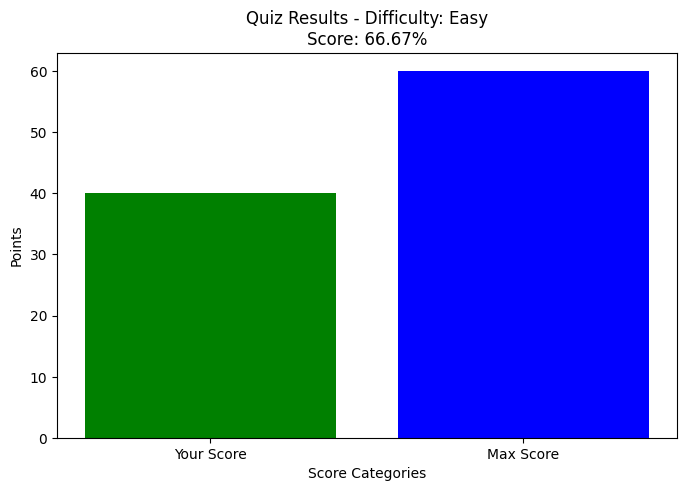

In [ ]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt

name_basics = pd.read_csv('data/name.basics.tsv', sep = '\t', usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'])
title_basics = pd.read_csv('data/title.basics.tsv', sep = '\t', usecols=['tconst', 'titleType', 'primaryTitle', 'genres'])
title_ratings = pd.read_csv('data/title.ratings.tsv', sep = '\t', usecols=['tconst', 'numVotes'])
title_principals = pd.read_csv('data/title.principals.tsv', sep = '\t', usecols=['tconst', 'ordering', 'nconst', 'category'])

# Filter the genres that I don't want
filtered_titles = title_basics[
    (title_basics['titleType'] == 'movie') &
    (~title_basics['genres'].str.contains(r'Animation|News|\\N|Film-Noir|Talk-Show|Adult|Reality-TV|Game-Show', na=False, regex=True))
]

filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')

top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')

easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

filtered_titles = title_basics[(title_basics['titleType'] == 'movie')]
filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')
movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')
top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')
easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 20
    elif level == 'hard':
        movies = hard
        points = 30
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    
    actor_data = movie_data[
        (movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = actor_data.iloc[np.random.choice(len(actor_data), size=4, replace=False)] 
    
    for _, row in actor_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    
    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')
    director_questions = director_data.iloc[np.random.choice(len(director_data), size=2, replace=False)] 
    
    for _, row in director_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    all_names = np.array(name_basics['primaryName'].tolist()) 
    
    while len(alternatives) < 4:
        random_choice = np.random.choice(all_names) 
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    np.random.shuffle(alternatives)  

    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1



def start_quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points 

    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        try:
            answer = int(input("Your answer (1-4): "))
            if answer < 1 or answer > 4:
                print("Invalid input. Please enter a number between 1 and 4.")
                continue
            elif answer == correct_option:
                print("Correct!")
                score += points
            else:
                print(f"Incorrect. The correct answer was {correct_answer}.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 4.")
    
    print(f"\nQuiz finished! Your final score is: {score}")

    plot_score(score, max_score, level)

def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(8, 5))
    plt.bar(categories, scores, color=['green', 'blue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

start_quiz()

In [ ]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt

name_basics = pd.read_csv('data/name.basics.tsv', sep = '\t', usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'])
title_basics = pd.read_csv('data/title.basics.tsv', sep = '\t', usecols=['tconst', 'titleType', 'primaryTitle', 'genres'])
title_ratings = pd.read_csv('data/title.ratings.tsv', sep = '\t', usecols=['tconst', 'numVotes'])
title_principals = pd.read_csv('data/title.principals.tsv', sep = '\t', usecols=['tconst', 'ordering', 'nconst', 'category'])

# Filter the genres that I don't want
filtered_titles = title_basics[
    (title_basics['titleType'] == 'movie') &
    (~title_basics['genres'].str.contains(r'Animation|News|\\N|Film-Noir|Talk-Show|Adult|Reality-TV|Game-Show', na=False, regex=True))
]

filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')

top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')

easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 20
    elif level == 'hard':
        movies = hard
        points = 30
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    
    actor_data = movie_data[
        (movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = actor_data.iloc[np.random.choice(len(actor_data), size=4, replace=False)] 
    
    for _, row in actor_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    
    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')
    director_questions = director_data.iloc[np.random.choice(len(director_data), size=2, replace=False)] 
    
    for _, row in director_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    all_names = np.array(name_basics['primaryName'].tolist()) 
    
    while len(alternatives) < 4:
        random_choice = np.random.choice(all_names) 
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    np.random.shuffle(alternatives)  

    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1



def start_quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points 

    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        try:
            answer = int(input("Your answer (1-4): "))
            if answer < 1 or answer > 4:
                print("Invalid input. Please enter a number between 1 and 4.")
                continue
            elif answer == correct_option:
                print("Correct!")
                score += points
            else:
                print(f"Incorrect. The correct answer was {correct_answer}.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 4.")
    
    print(f"\nQuiz finished! Your final score is: {score}")

    plot_score(score, max_score, level)

def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(8, 5))
    plt.bar(categories, scores, color=['green', 'blue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

start_quiz()

Welcome to the Movie Quiz!

Who starred the movie "Dune: Part One"?
1. Timothée Chalamet
2. Anastasia Chala
3. Katie Macgruder
4. Noam Levin
Correct!

Who starred the movie "The Lord of the Rings: The Fellowship of the Ring"?
1. Lance Bogart
2. Véni Lacombe
3. Chu-chu Lin
4. Elijah Wood
Correct!

Who starred the movie "Full Metal Jacket"?
1. Mirella Dell'Aquila
2. James Fair
3. Ralph Pauly
4. Matthew Modine
Incorrect. The correct answer was Matthew Modine.

Who starred the movie "Snatch"?
1. Case Gonzalez
2. Jason Statham
3. Shaolin
4. Eric Williams
Incorrect. The correct answer was Jason Statham.

Who is the director of the movie "The Prestige"?
1. Melody
2. Ben Kelder
3. Tom Peoples
4. Christopher Nolan
Correct!

Who is the director of the movie "Star Wars: Episode I - The Phantom Menace"?
1. Jesse Valdez
2. Azariah Burnett
3. Martin Kistler
4. George Lucas
Correct!

Quiz finished! Your final score is: 40
You scored 66.67% of the maximum points.


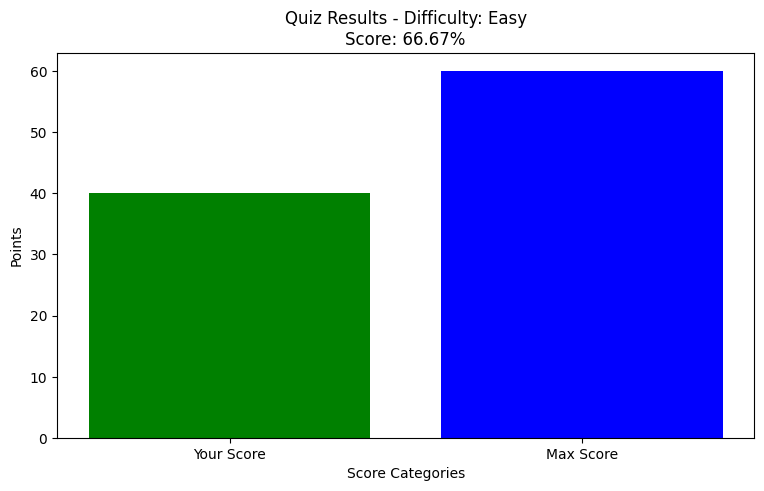

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

name_basics = pd.read_csv(
    'data/name.basics.tsv', 
    sep='\t', 
    usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'],
    dtype={'nconst': 'str', 'primaryName': 'str', 'primaryProfession': 'str', 'knownForTitles': 'str'}
)

title_basics = pd.read_csv(
    'data/title.basics.tsv', 
    sep='\t', 
    usecols=['tconst', 'titleType', 'primaryTitle', 'genres'],
    dtype={'tconst': 'str', 'titleType': 'str', 'primaryTitle': 'str', 'genres': 'str'}
)

title_ratings = pd.read_csv(
    'data/title.ratings.tsv', 
    sep='\t', 
    usecols=['tconst', 'numVotes'],
    dtype={'tconst': 'str', 'numVotes': 'int32'}
)

title_principals = pd.read_csv(
    'data/title.principals.tsv', 
    sep='\t', 
    usecols=['tconst', 'ordering', 'nconst', 'category'],
    dtype={'tconst': 'str', 'ordering': 'int32', 'nconst': 'str', 'category': 'category'}
)

# Filter the genres that I don't want
filtered_titles = title_basics[
    (title_basics['titleType'] == 'movie') & 
    (~title_basics['genres'].str.contains(r'Animation|News|\\N|Film-Noir|Talk-Show|Adult|Reality-TV|Game-Show', na=False, regex=True))
]

filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')

top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')

easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 20
    elif level == 'hard':
        movies = hard
        points = 30
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    actor_data = movie_data[
        (movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = actor_data.iloc[np.random.choice(len(actor_data), size=4, replace=False)] 
    
    for _, row in actor_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')
    director_questions = director_data.iloc[np.random.choice(len(director_data), size=2, replace=False)] 
    
    for _, row in director_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    all_names = np.array(name_basics['primaryName'].tolist()) 
    
    while len(alternatives) < 4:
        random_choice = np.random.choice(all_names) 
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    np.random.shuffle(alternatives)  

    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1

def start_quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points 

    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        try:
            answer = int(input("Your answer (1-4): "))
            if answer < 1 or answer > 4:
                print("Invalid input. Please enter a number between 1 and 4.")
                continue
            elif answer == correct_option:
                print("Correct!")
                score += points
            else:
                print(f"Incorrect. The correct answer was {correct_answer}.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 4.")
    
    print(f"\nQuiz finished! Your final score is: {score}")

    plot_score(score, max_score, level)

def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(9, 5))
    plt.bar(categories, scores, color=['green', 'blue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

start_quiz()